In [191]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [192]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [193]:
df.nunique()
# Here Encoding is done in level

Position    10
Level       10
Salary      10
dtype: int64

In [194]:
x = df.iloc[:, 1:-1]
y = df.iloc[:,-1]
print(x)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, shuffle = True, random_state = 42)

In [196]:
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree = 2)
polyReg.fit(x_train)
x_poly = polyReg.transform(x_test)
print(x_poly) # Degree = 3 here means x^0 + x^1 + x^2 + x^3  

[[ 1.  9. 81.]
 [ 1.  2.  4.]
 [ 1.  6. 36.]
 [ 1.  1.  1.]
 [ 1.  8. 64.]]


In [197]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_poly, y_test)

LinearRegression()

In [198]:
y_pred = lr.predict(x_poly)
y_pred

array([473762.85479227,  29726.45002057, 141174.41382147,  61150.7610037 ,
       339185.52036199])

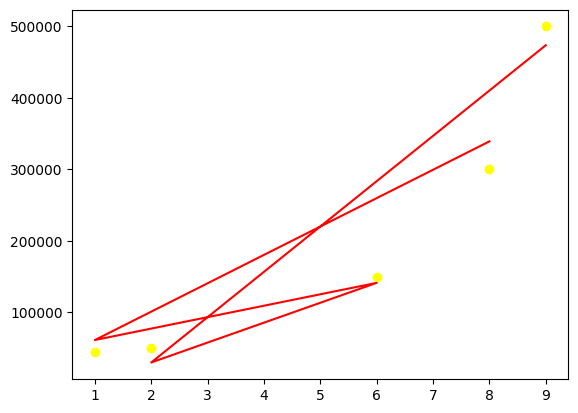

In [199]:
#plt.scatter(x_train,y_train, color = 'blue')
plt.scatter(x_test,y_test, color = 'yellow')
plt.plot(x_test, y_pred, color = 'red')

In [200]:
from sklearn.metrics import r2_score,mean_absolute_error

In [201]:
print("The r2 score is : ", r2_score(y_train, y_pred))

The r2 score is :  -0.7664124201400033


In [202]:
# For degree = 1, it is a linear regression model